In [1]:
import pandas as pd # bibliteca Dataframe.
import urllib.request as urllib_request # Definando funções e classes na abertura de URLS
from urllib.request import urlopen # abrindo o URL
from bs4 import BeautifulSoup # biblioteca de extração dos dados do HTML.
import pymongo # interagindo python com banco de dados do MONGODB
import json # inserindo dicionario no banco de dados

# Configurando o banco de dados.
# myClient = pymongo.MongoClient("mongodb://localhost:27017/")
# mydb = myClient["Noticia"]
# mycol = mydb["Artigos"]

# importanto as urls em forma de lista.
urls = ['https://www1.folha.uol.com.br/banco-de-dados/2021/05/1921-governo-pretende-iniciar-a-cobranca-do-imposto-sobre-jogos-em-cassinos.shtml', 
        'https://www1.folha.uol.com.br/banco-de-dados/2021/05/1921-light-diminui-desconto-na-conta-de-luz-e-superintendente-justifica.shtml', 
        'https://www1.folha.uol.com.br/banco-de-dados/2021/05/1921-navio-do-lloyd-brasileiro-afunda-na-baia-de-guanabara-nao-ha-mortos.shtml', 
        'https://www1.folha.uol.com.br/banco-de-dados/2021/05/1921-quartel-militar-em-cidade-no-vale-do-paraiba-registra-casos-de-meningite.shtml', 
        'https://www1.folha.uol.com.br/banco-de-dados/2021/05/1921-preco-do-cafe-vendido-em-sao-paulo-cai-depois-de-protesto-de-fregueses.shtml', 
        'https://www1.folha.uol.com.br/banco-de-dados/2021/05/1921-aviador-orton-hoover-bate-recorde-ao-fazer-travessia-sp-rj-em-2h15.shtml', 
        'https://www1.folha.uol.com.br/banco-de-dados/2021/05/1921-estrada-de-ferro-central-do-brasil-registra-3-acidentes-no-mesmo-dia.shtml',
        'https://www1.folha.uol.com.br/banco-de-dados/2021/05/1921-presidente-aprova-regulamentacao-de-imposto-sobre-jogos-em-cassinos.shtml', 
        'https://www1.folha.uol.com.br/banco-de-dados/2021/06/1921-nilo-pecanha-pode-virar-opcao-a-candidatura-de-arthur-bernardes.shtml', 
        'https://www1.folha.uol.com.br/banco-de-dados/2021/05/1921-com-matanca-de-gado-em-sao-paulo-risco-de-escassez-de-leite-preocupa.shtml']

artigos = []
titulos = []

# Fazendo tratamento de dados
for x in range(len(urls)):
    # obtendo o conteúdo HTML.
    response = urlopen(urls[x])
    html = response.read()
    html = html.decode('utf-8')

    # Selecionando os dados do HTML e transformando o em um objeto.
    soup = BeautifulSoup(html, 'html.parser')

    # Pegando o titulo.assert.
    titulo = soup.find('h1', {'class':'c-content-head__title'}).get_text()
    # Tirando os \n e os espaçamentos extras dos titulos.
    titulo = "".join(titulo).replace('\n', '').replace('\r', '').replace('  ','')
    titulos.append(titulo)
    # Pegando artigo.
    artigo = soup.find('div', {'class':'c-news__body'}).get_text()
    # Tirando os \n e os espaçamentos extras dos artigos.
    artigo = "".join(artigo).replace('\n', '').replace('\r', '').replace('  ','').replace('- Reprodução ', '')
    artigos.append(artigo)
    # Associando o titulo ao artigo.
    noticia = {}
    noticia[titulo] = artigo
    print(noticia)

    # Transformando em JSON
    # matriz = json.dumps(noticia, ensure_ascii = False)
    # mycol.insert_one(noticia)

{'1921: Governo pretende iniciar a cobrança do imposto sobre jogos em cassinos': 'O governo vai efetuar a cobrança do imposto sobre as quantias em giro nas bancas dos cassinos nas estações balneárias. Foi isso o que indicou o funcionário da Recebedoria Severiano Cavalcanti (que fez parte da comissão encarregada de regulamentar esse tributo) ao jornal A Noite, do Rio.“É uma fonte de receita com aplicação especial aos serviços de saúde pública e forçosamente terá de ser coletada essa renda”, disse Cavalcanti.O Ministério da Fazenda tratou da regulamentação do imposto (aprovado em 1920), depois de alterada a taxa de 15% para 2%.Até agora, porém, o regulamento não foi baixado.Primeira Página da Folha da Noite de 14 de maio de 1921 - Reprodução'}
{'1921: Light diminui desconto na conta de luz, e superintendente justifica': 'Despertou antipatia nos consumidores a redução no desconto que a Light estabelece para quem paga a conta de energia elétrica, no escritório da companhia, em até dez dias

# **Separando titulos e Paragrafos**

In [2]:
titulos_paragrafos = []

for x in titulos:
    titulos_paragrafos.append(x.strip())

titulos_paragrafos

['1921: Governo pretende iniciar a cobrança do imposto sobre jogos em cassinos',
 '1921: Light diminui desconto na conta de luz, e superintendente justifica',
 '1921: Navio do Lloyd Brasileiro afunda na Baía de Guanabara; não há mortos',
 '1921: Quartel militar em cidade no Vale do Paraíba registra casos de meningite',
 '1921: Preço do café vendido em São Paulo cai depois de protesto de fregueses',
 '1921: Aviador Orton Hoover bate recorde ao fazer travessia SP-RJ em 2h15',
 '1921: Estrada de Ferro Central do Brasil registra 3 acidentes no mesmo dia',
 '1921: Presidente aprova regulamentação de imposto sobre jogos em cassinos',
 '1921: Nilo Peçanha pode virar opção à candidatura de Arthur Bernardes',
 '1921: Com matança de gado em São Paulo, risco de escassez de leite preocupa']

In [3]:
paragrafos = []

for x in artigos:
    paragrafos.append(x.strip())

print(paragrafos[1])

Despertou antipatia nos consumidores a redução no desconto que a Light estabelece para quem paga a conta de energia elétrica, no escritório da companhia, em até dez dias após a data da entrega.O superintendente dos negócios da empresa em São Paulo, McConnel, afirmou que os preços dos materiais encareceram assombrosamente.“Como todas as grandes empresas pelo mundo, a Light atravessa neste momento uma situação bem diversa daquela em que se encontrava antes da guerra”, disse.McConnel declarou que não há nada no contrato que obrigue a companhia a proporcionar esses descontos.Primeira Página da Folha da Noite de 13 de maio de 1921 - Reprodução


In [4]:
# !pip install deplacy
# !python -m spacy download pt_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


1921: Governo pretende iniciar a cobrança do imposto sobre jogos em cassinos


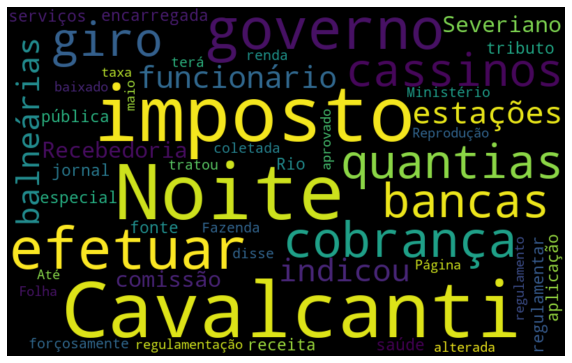



1921: Light diminui desconto na conta de luz, e superintendente justifica


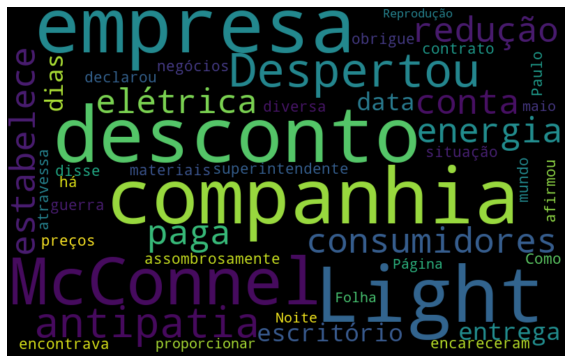



1921: Navio do Lloyd Brasileiro afunda na Baía de Guanabara; não há mortos


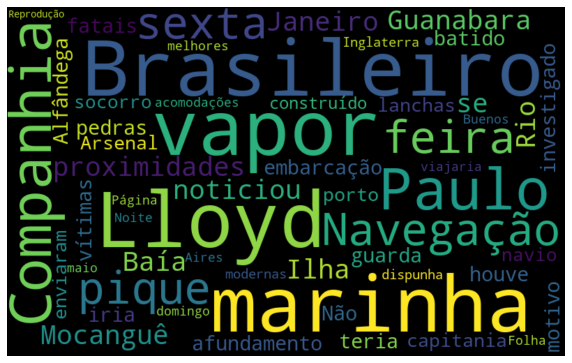



1921: Quartel militar em cidade no Vale do Paraíba registra casos de meningite


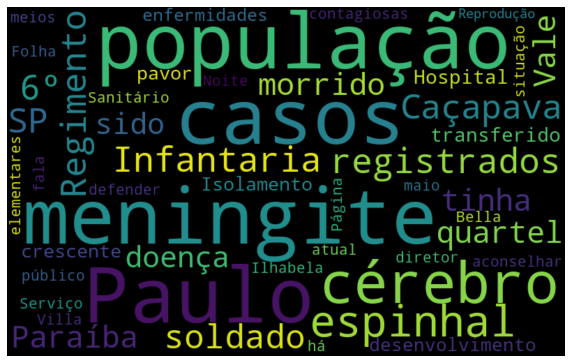



1921: Preço do café vendido em São Paulo cai depois de protesto de fregueses


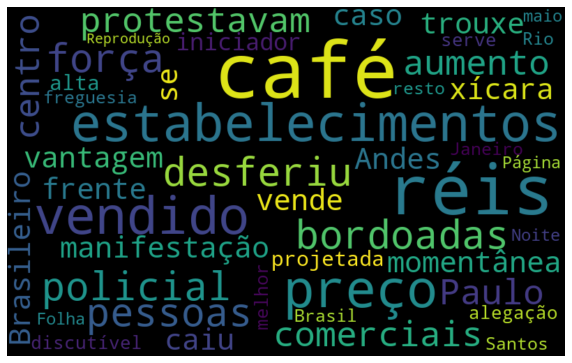



1921: Aviador Orton Hoover bate recorde ao fazer travessia SP-RJ em 2h15


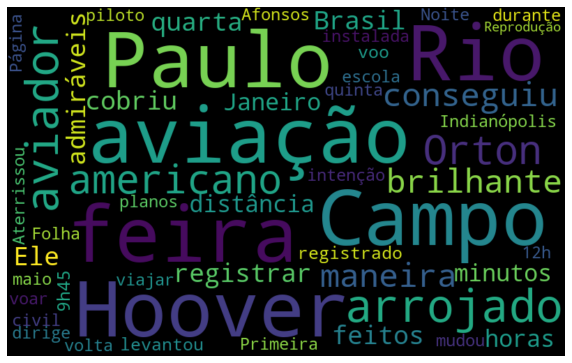



1921: Estrada de Ferro Central do Brasil registra 3 acidentes no mesmo dia


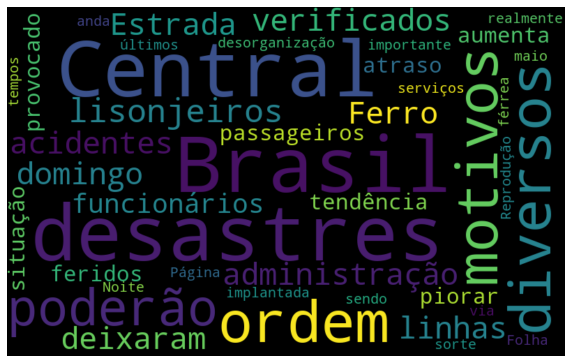



1921: Presidente aprova regulamentação de imposto sobre jogos em cassinos


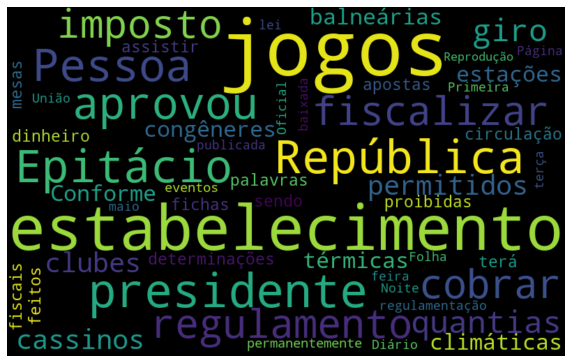



1921: Nilo Peçanha pode virar opção à candidatura de Arthur Bernardes


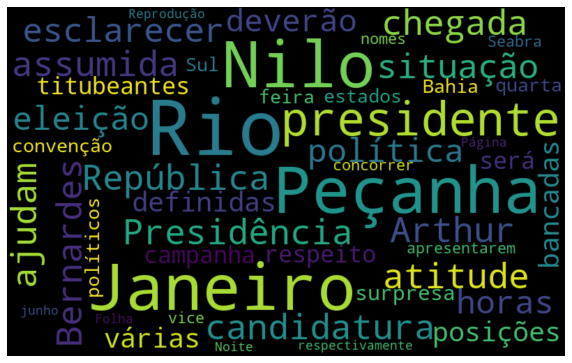



1921: Com matança de gado em São Paulo, risco de escassez de leite preocupa


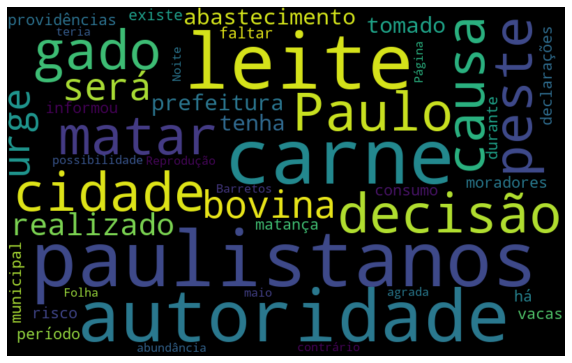

In [5]:
# importanto bibliotecas de trativa de sentimentos
from wordcloud import WordCloud , STOPWORDS
import matplotlib.pyplot as plt
import spacy
import pt_core_news_sm

nlp = spacy.load("pt_core_news_sm")

# fazendo loop de tratativa com spacy
for i in range(len(paragrafos)):
    interando = paragrafos[i]
    paragrafos_npl = nlp(str(interando))

    # tratando os dados dentro dos paragrafos
    tokens = [token for token in paragrafos_npl if not token.is_stop and token.is_punct != True]
    todas_palavras = ' '.join([str(item) for item in tokens])
    todas_palavras = todas_palavras.replace('< p >','').replace('</p >','') # fazendo remoção dos StopWords

    stopwords = set(STOPWORDS)
    stopwords.add("said")

    # Otimizando a visualização da nuvem de palavras
    nuvem_palavras = WordCloud(width = 800, height = 500,
                                      max_font_size = 110, collocations = False, 
                                      contour_width = 3, background_color='black').generate(todas_palavras)
    # Widht = Largura da tela.
    # Height = Altaura da tela.
    # Max_font_size = Tamanho da fonte.
    # contour_width = espessua do contorno.
    # background_color = Cor de fundo.
    
    nuvem_palavras.generate(todas_palavras)

    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    print(titulos_paragrafos[i])
 
    plt.show()
    print('\n')


# **Extraindo entidades nomeadas dentro dos paragrafos.**

In [6]:
from spacy import displacy # Importanto displacy

# Destacando as palavras nomeadas em cada paragrafo.
for i in range(len(paragrafos)):
    doc = nlp(paragrafos[i])
    print(f'Entidades nomeadas: {titulos_paragrafos[i]}:\n')
    displacy.render(doc, style = 'ent', jupyter = True)
    displacy.render(doc, style = 'dep') 
    print('\n \n')

Entidades nomeadas: 1921: Governo pretende iniciar a cobrança do imposto sobre jogos em cassinos:




 

Entidades nomeadas: 1921: Light diminui desconto na conta de luz, e superintendente justifica:




 

Entidades nomeadas: 1921: Navio do Lloyd Brasileiro afunda na Baía de Guanabara; não há mortos:




 

Entidades nomeadas: 1921: Quartel militar em cidade no Vale do Paraíba registra casos de meningite:




 

Entidades nomeadas: 1921: Preço do café vendido em São Paulo cai depois de protesto de fregueses:




 

Entidades nomeadas: 1921: Aviador Orton Hoover bate recorde ao fazer travessia SP-RJ em 2h15:




 

Entidades nomeadas: 1921: Estrada de Ferro Central do Brasil registra 3 acidentes no mesmo dia:




 

Entidades nomeadas: 1921: Presidente aprova regulamentação de imposto sobre jogos em cassinos:




 

Entidades nomeadas: 1921: Nilo Peçanha pode virar opção à candidatura de Arthur Bernardes:




 

Entidades nomeadas: 1921: Com matança de gado em São Paulo, risco de escassez de leite preocupa:



# **Análise de sentimentos**

In [12]:
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [8]:
# Fazendo contagem dos registros.
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tweets_Mg.csv',encoding='utf-8')
dataset.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Separando tweets
tweets = dataset["Text"].values
tweets

array(['���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ',
       '� @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf',
       '�� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw',
       ...,
       'Trio é preso suspeito de roubo, tráfico e abuso sexual em Uberlândia https://t.co/zaQbXRRJWc',
       'Trio é preso suspeito de roubo, tráfico e abuso sexual em Uberlândia: Um dos autores teria molestado vítima de… https://t.co/lQ8cTSNftA',
       'Trio suspeito de roubo de cargas é preso em Santa Luzia (MG) https://t.co/0INgJcMtZb #R7MG #RecordTVMinas'],
      dtype=object)

In [10]:
# Separando classes do tweets.
classes = dataset["Classificacao"].values
classes

array(['Neutro', 'Neutro', 'Neutro', ..., 'Positivo', 'Positivo',
       'Positivo'], dtype=object)

In [25]:
# Fazendo vetorização do texto por palavras.
vectorizer = CountVectorizer(ngram_range = (1, 2))
freq_tweets = vectorizer.fit_transform(tweets)

modelo = MultinomialNB()
modelo.fit(freq_tweets, classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
# Classificando o modelo treino
freq_testes = vectorizer.transform(paragrafos)
modelo.predict(freq_testes)

array(['Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro',
       'Neutro', 'Neutro', 'Neutro', 'Neutro'], dtype='<U8')

In [27]:
# divido modelo em 10 partes, 9 treinamentos com 1 teste.
resultados = cross_val_predict(modelo, freq_tweets, classes, cv = 10)
resultados

array(['Neutro', 'Neutro', 'Neutro', ..., 'Positivo', 'Positivo',
       'Positivo'], dtype='<U8')

In [28]:
print(round(metrics.accuracy_score(classes, resultados), 4)*100)

89.55


In [29]:
# Validação do modelo.
sentimentos = ["Positivo", "Negativo", "Neutro"]
print(metrics.classification_report(classes, resultados, sentimentos))

              precision    recall  f1-score   support

    Positivo       0.97      0.88      0.92      3300
    Negativo       0.91      0.93      0.92      2446
      Neutro       0.80      0.89      0.84      2453

    accuracy                           0.90      8199
   macro avg       0.89      0.90      0.89      8199
weighted avg       0.90      0.90      0.90      8199



In [38]:
# Gerando tabela com DataFrame
testes_id = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

data_frame = pd.DataFrame(data = { "id": testes_id, "texto": paragrafos, "sentimento": resultados[: 10]})
data_frame

,id,texto,sentimento
0,1,O governo vai efetuar a cobrança do imposto so...,Neutro
1,2,Despertou antipatia nos consumidores a redução...,Neutro
2,3,"O vapor S. Paulo, da Companhia de Navegação Ll...",Neutro
3,4,Mais três casos de meningite cérebro-espinhal ...,Positivo
4,5,A força policial desferiu bordoadas nas pessoa...,Negativo
5,6,O arrojado aviador americano Orton Hoover cons...,Neutro
6,7,"Por falta de ordem ou por motivos diversos, qu...",Neutro
7,8,"O presidente da República, Epitácio Pessoa, ap...",Neutro
8,9,A chegada ao Rio de Janeiro de Nilo Peçanha e ...,Negativo
9,10,Com a decisão das autoridades de matar todo o ...,Neutro


In [ ]:
# inserindo no banco de dados.
# mycol.insert_one(data)